# ZOMATO: Data Analysis

_Analyzing Order Patterns, Ratings, and Spending Behavior"_
****************
1) What type of restaurant do the majority of customers order from?
2. How many votes has each type of restaurant received from customers? 
3) What are the ratings that the majority of restaurants have received?
4)Zomato has observed that most couples order most of their food online. What is their
average spending on each order? 
5) Which mode (online or offline) has received the maximum rating?
6) Which type of restaurant received more offline orders, so that Zomato can
customers with some good offers?

In [2]:
# Step-1 : Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step-2: create the data frame

In [3]:
dataframe = pd.read_csv("Zomato data.csv")

In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step-3 : Data cleaning 

In [5]:
# Convert the data type of colom-rate 

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)

dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Step-4 : Type of Resturent

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurent')

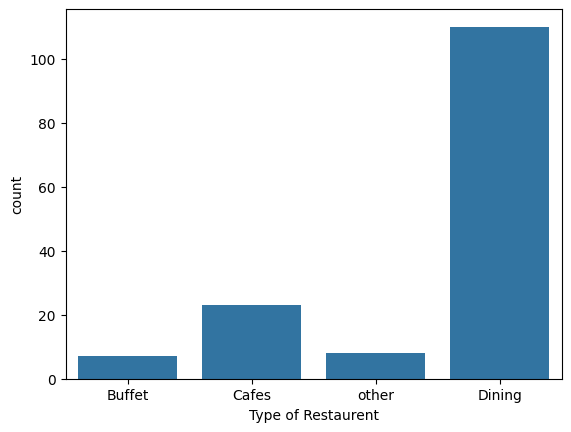

In [8]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of Restaurent')

Conclusion- Majority of the Restaurent falls in dinning category

In [9]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


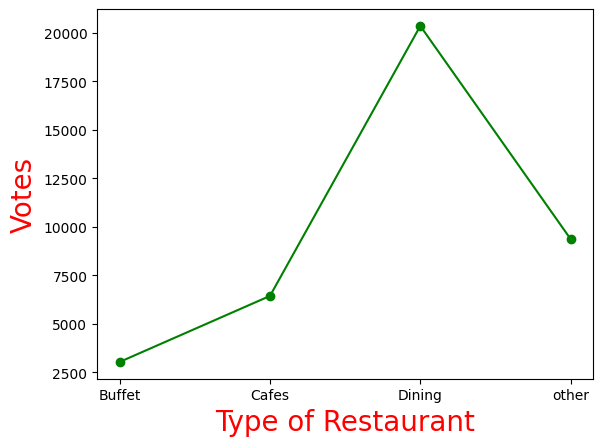

In [10]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

# Plotting
plt.plot(result.index, result['votes'], c="green", marker="o")  

# Axis labels w
plt.xlabel("Type of Restaurant", color="red", fontsize=20)
plt.ylabel("Votes", color='red', fontsize=20)

# Display the plot
plt.show()

Conclusion: Dining Restaurandts recived more votes

__Question-3: Highest Rating__

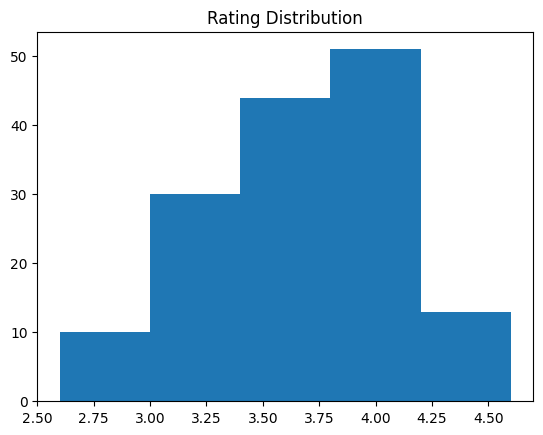

In [11]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

Conclusion:The Majority rating of the Restaurent is 3.5-4

__Question-4 :Average order Spending By Couple__

In [12]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


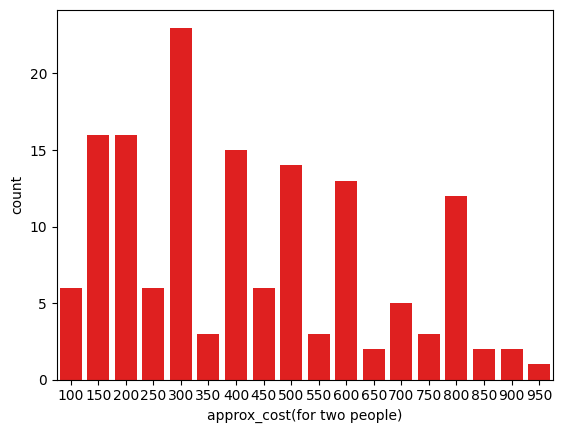

In [13]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,color='red')
plt.show()

Conclusion: Majority spending cost by couple is 300

__Question-5 : Which mode Recives maximum ratings__

In [14]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


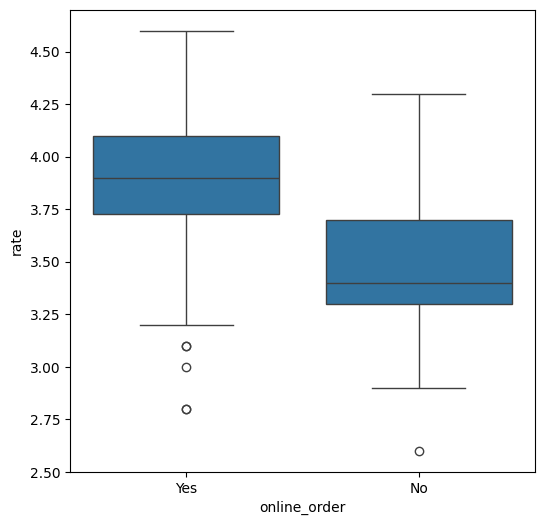

In [15]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data= dataframe)
plt.show()

Conclusion: Offline order recived less rating compare to Online order

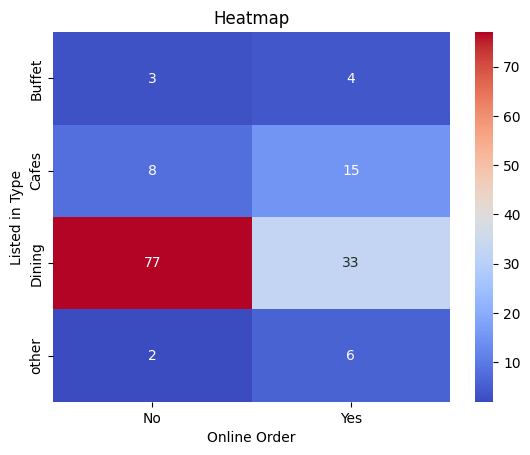

In [22]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order', aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="plasma", fmt='d')
plt.title("Heatmap")
plt.xlabel('Online Order')
plt.ylabel("Listed in Type")
plt.show()